# HIV Model
Riya, Dhara, Chris

10-15-18

State: uninfected cells, latent cells, active cells, viron cells

System: rates

Parameters: initial number of infected cells

In [12]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


### Define State for the initial condition
- Uninfected Cells, Latent Cells, Active Cells, Viron Cells

In [13]:
init = State(uninf = 200, lat = 0, act = 0, vir = 4e-7)

,values
uninf,2.000000e+02
lat,0.000000e+00
act,0.000000e+00
vir,4.000000e-07


### Define System (Rates)

In [14]:
gammat = 1.36*0.2 # Tau * Gamma

system = System ( gammat = gammat, 
                  sigma = 2, 
                  beta = 0.00027, 
                  alpha = 0.036, 
                  mu = .00136, 
                  pi = 100, 
                  delta = 0.33,
                  rho = 0.1,
                  t0 = 0, 
                  t_end = 120)

,values
gammat,0.27200
sigma,2.00000
beta,0.00027
alpha,0.03600
mu,0.00136
pi,100.00000
delta,0.33000
rho,0.10000
t0,0.00000
t_end,120.00000


## Update Function

In [15]:
def update_func2(state, t, system): 
    
    
    #FLOW IN
    uninf = system.gammat*state.uninf
    lat = system.betaV*state.vir * state.uninf * system.rho
    act1 = system.alpha*state.lat
    act2 = system.delta*state.uninf
    act = act1+act2
    vir = system.pi*state.act
    
    #FLOW OUT
    uninf -= system.mu*uninf
    lat1 = system.alpha*lat
    lat2 = system.mu*lat1
    act -= system.delta*act
    vir -= system.sigma*vir
    
    return State(uninf = uninf, lat = lat2, act = act, vir = vir)

In [16]:
def update_func(state, t, system): 
    unpack(system)
    R = state.uninf;
    L = state.lat;
    E = state.act;
    V = state.vir;
    dt = 0.01
    
    rChange = (gammat - mu * R - beta * V * R) * dt
    lChange = (rho * beta * V * R - mu * L - alpha * L) * dt
    eChange = ((1 - rho) * beta * V * R + alpha * L - delta * E) * dt
    vChange = (pi * E - sigma * V) * dt
    
    return State(uninf = rChange + R, lat = lChange + L, act = eChange + E, vir = vChange + V)

## Run Simulation

In [17]:
def run_simulation(system, update_func, init):
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end, .01):
        frame.row[t+.01] = update_func(frame.row[t], t, system)
    
    return frame

## Plot Results

In [18]:
def plot_results(uinf, lat, act, vir):
    plot(uinf, '--', label='Uninfected Cells')
    plot(lat, '-', label='Latent Cells')
    plot(act, '--', label='Uninfected Cells')
    plot(vir, '-', label='Virons')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of Population')

      uninf           lat           act           vir
0.00  200.0  0.000000e+00  0.000000e+00  4.000000e-07
0.01  200.0  2.160000e-11  1.944000e-10  3.920000e-07
0.02  200.0  4.275993e-11  3.842783e-10  3.843544e-07
0.03  200.0  6.349909e-11  5.698218e-10  3.770516e-07
0.04  200.0  8.383616e-11  7.512113e-10  3.700804e-07


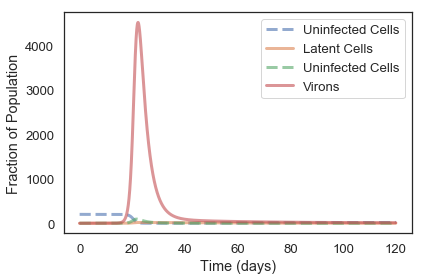

In [19]:
results = run_simulation(system, update_func, init)
print (results.head())
plot_results(results.uninf, results.lat, results.act, results.vir )

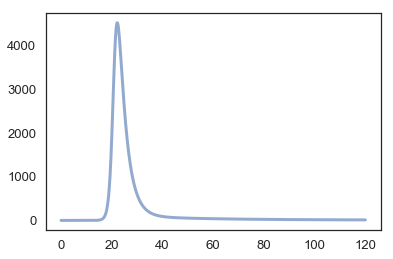

In [20]:
plot(results.vir)